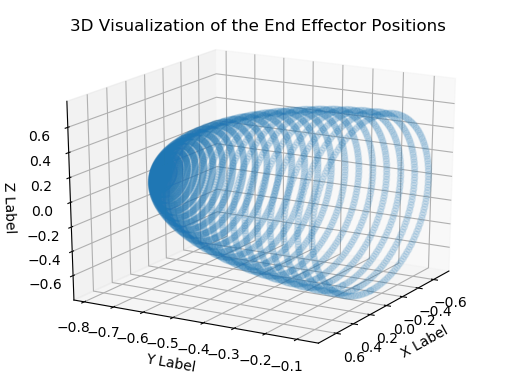

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from pytransform3d.urdf import UrdfTransformManager
 
csv_file_path = 'end_effector_positions_only2.csv'
 
x, y, z = [], [], []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x.append(float(row['x']))
        y.append(float(row['y']))
        z.append(float(row['z']))
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x, y, z, alpha=0.1)
 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
ax.set_title('3D Visualization of the End Effector Positions')

ax.set_xlim()

ax.view_init(elev=20, azim=30)
 
plt.show()

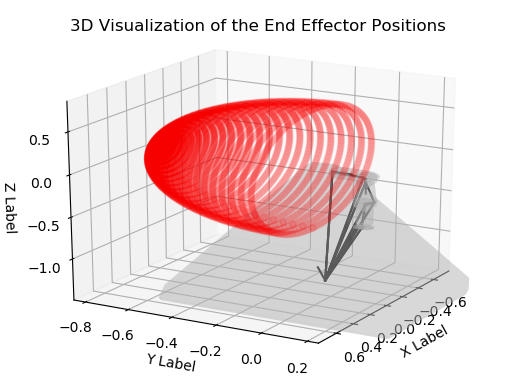

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from pytransform3d.urdf import UrdfTransformManager

conditions = {
    'x': (-0.4, 0.4),
    'y': (-0.4, -0.1),
    'z': (None, -0.2)
}
 
ring_conditions = {
    'r_min': 0.15,
    'r_max': 10
}

def is_point_within_conditions(x, y, z, conditions, ring_conditions):
    within_conditions = (
        (conditions['x'][0] is None or x >= conditions['x'][0]) and
        (conditions['x'][1] is None or x <= conditions['x'][1]) and
        (conditions['y'][0] is None or y >= conditions['y'][0]) and
        (conditions['y'][1] is None or y <= conditions['y'][1]) and
        (conditions['z'][0] is None or z >= conditions['z'][0]) and
        (conditions['z'][1] is None or z <= conditions['z'][1])
    )
    r = np.sqrt(x**2 + y**2)
    within_ring_conditions = r >= ring_conditions['r_min'] and r <= ring_conditions['r_max']
    return within_conditions and within_ring_conditions

urdf_file_path = "/home/robros/catkin_ws/src/NewNew_description/urdf/model.urdf"
mesh_directory = "/home/robros/catkin_ws/src/NewNew_description/meshes"

tm = UrdfTransformManager()

with open(urdf_file_path, "r") as urdf_file:
    urdf_content = urdf_file.read()
    urdf_content = urdf_content.replace('package://NewNew_description/meshes', mesh_directory)
    tm.load_urdf(urdf_content, mesh_path=mesh_directory)

csv_file_path = 'end_effector_positions_only2.csv'
x, y, z = [], [], []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x.append(float(row['x']))
        y.append(float(row['y']))
        z.append(float(row['z']))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax = tm.plot_connections_in("link1", ax=ax)  
tm.plot_visuals("link1", ax=ax)  


ax.scatter(x, y, z, alpha=0.1, color='red')  


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Visualization of the End Effector Positions')

# x_ticks = np.arange(start=x_min, stop=x_max, step=1)

ax.view_init(elev=20, azim=30)

plt.show()


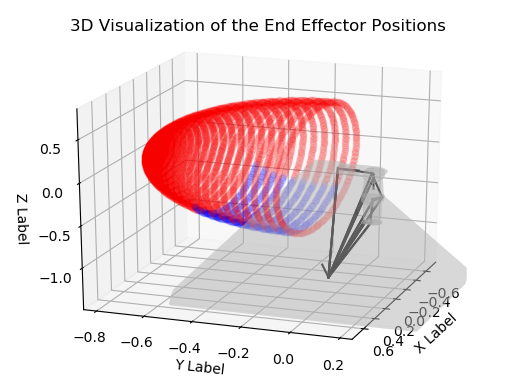

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from pytransform3d.urdf import UrdfTransformManager
 
urdf_file_path = "/home/robros/catkin_ws/src/NewNew_description/urdf/model.urdf"
mesh_directory = "/home/robros/catkin_ws/src/NewNew_description/meshes"
 
tm = UrdfTransformManager()
with open(urdf_file_path, "r") as urdf_file:
    urdf_content = urdf_file.read()
    urdf_content = urdf_content.replace('package://NewNew_description/meshes', mesh_directory)
    tm.load_urdf(urdf_content, mesh_path=mesh_directory)
 
csv_file_path = 'end_effector_positions_only2.csv'
x, y, z = [], [], []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        x.append(float(row['x']))
        y.append(float(row['y']))
        z.append(float(row['z']))
 

conditions = {
    'x': (-0.5, 0.5),
    'y': (-0.5, -0.1),
    'z': (None, -0.2)
}
 
ring_conditions = {
    'r_min': 0.0,
    'r_max': 1  
}
 

def color_based_on_condition(x, y, z, conditions, ring_conditions):
    r = np.sqrt(x**2 + y**2)  
    if conditions['x'][0] <= x <= conditions['x'][1] and conditions['y'][0] <= y <= conditions['y'][1] and (conditions['z'][0] is None or z >= conditions['z'][0]) and (conditions['z'][1] is None or z <= conditions['z'][1]) and ring_conditions['r_min'] <= r <= ring_conditions['r_max']:
        return 'blue'
    else:
        return 'red'
 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 

ax = tm.plot_connections_in("link1", ax=ax)
tm.plot_visuals("link1", ax=ax)
 

for i in range(len(x)):
    ax.scatter(x[i], y[i], z[i], alpha=0.1, color=color_based_on_condition(x[i], y[i], z[i], conditions, ring_conditions))
 

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Visualization of the End Effector Positions')
 

ax.view_init(elev=20, azim=20)
 

plt.show()

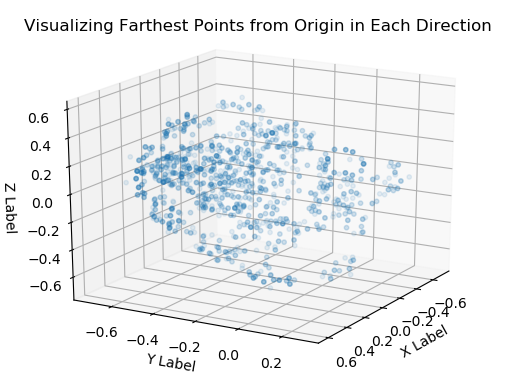

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
 
csv_file_path = 'end_effector_positions_all.csv'
 
data = []
with open(csv_file_path, newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  
    for row in reader:
        data.append([float(row[i]) for i in range(1, 4)])  
 
# 원점으로부터의 거리와 방향을 기준으로 최대 거리의 점을 선택
def select_farthest_points(data):
    normalized = {}
    for x, y, z in data:
        direction = np.array([x, y, z]) / np.linalg.norm([x, y, z])  # 방향 벡터 정규화
        key = tuple(direction)  
        distance = np.linalg.norm([x, y, z])
        if key not in normalized or distance > normalized[key][3]:
            normalized[key] = [x, y, z, distance]
 
    return [value[:3] for value in normalized.values()]
 
# 최대 거리의 점들 선택
selected_points = select_farthest_points(data)
 
# 무작위로 선택된 데이터로부터 x, y, z 좌표 분리
x, y, z = zip(*selected_points)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(x, y, z, alpha=0.1, s=10)
 
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
 
ax.set_title('Visualizing Farthest Points from Origin in Each Direction')

ax.view_init(elev=20, azim=30)
plt.show()

/home/robros/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


283
581
339
278
298


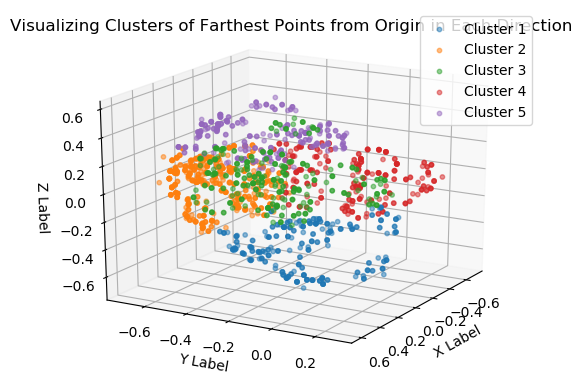

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from sklearn.cluster import KMeans

data = []
with open('end_effector_positions_all.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader, None)  
    for row in reader:
        data.append([float(row[i]) for i in range(1, 4)]) 

def select_farthest_points(data):
    normalized = {}
    for x, y, z in data:
        direction = np.array([x, y, z]) / np.linalg.norm([x, y, z])  
        key = tuple(direction)  
        distance = np.linalg.norm([x, y, z])
        if key not in normalized or distance > normalized[key][3]:
            normalized[key] = [x, y, z, distance]
 
    return [value[:3] for value in normalized.values()]

selected_points = select_farthest_points(data)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(selected_points)
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    cluster_points = np.array(selected_points)[labels == i]
    print(len(cluster_points))
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], alpha=0.5, s=10, label=f'Cluster {i+1}')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Visualizing Clusters of Farthest Points from Origin in Each Direction')

ax.legend()

ax.view_init(elev=20, azim=30)

plt.show()


In [10]:
import numpy as np
 
angle_ranges = [
    (-2.09, 1.57),
    (-2.09, 0),
    (-1.57, 1.57),
    (0, 2.09),
    (-1.57, 1.57),
    (-1.04, 1.04),
    (-1.04, 1.04),
]
 
def calculate_num_values(range_min, range_max, min_points=3, max_points=10):
    range_size = range_max - range_min
    full_range_size = 2.09 + 2.09
    num = int(min_points + (range_size / full_range_size) * (max_points - min_points))
    return max(min_points, min(num, max_points))  
 
linspace_parameters = [
    np.linspace(start, end, num=calculate_num_values(start, end))
    for start, end in angle_ranges
]
 
for params in linspace_parameters:
    print(len(params))

9
6
8
6
8
6
6


In [17]:
import numpy as np
import csv
from sklearn.cluster import KMeans

def read_and_cluster_data(csv_input_path, n_clusters=5):
    """데이터를 읽고 클러스터링한 후 클러스터링 결과를 CSV로 저장"""
    data = []
    with open(csv_input_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)  
        for row in reader:
            data.append([float(row[i]) for i in range(1, 4)]) 
    data = np.array(data)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data)
    labels = kmeans.labels_
    
    with open('clustered_data.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x", "y", "z", "cluster_label"])
        for i in range(len(data)):
            writer.writerow(list(data[i]) + [labels[i]])

csv_input_path = 'end_effector_positions.csv'
read_and_cluster_data(csv_input_path, n_clusters=5)


/home/robros/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


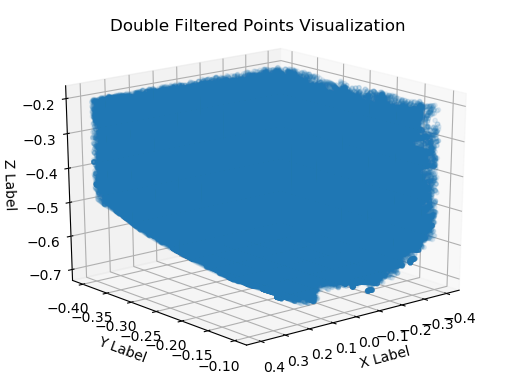

In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

conditions = {
    'x': (-0.4, 0.4),
    'y': (-0.4, -0.1),
    'z': (None, -0.2)
}

ring_conditions = {
    'r_min': 0.15,
    'r_max': 10
}

def check_conditions(x, y, z, conditions):
    for axis, (min_val, max_val) in conditions.items():
        value = {'x': x, 'y': y, 'z': z}[axis]
        if min_val is not None and value < min_val:
            return False
        if max_val is not None and value >= max_val:
            return False
    return True

def check_ring_conditions(x, y, z, ring_conditions):
    r = math.sqrt(x**2 + y**2)
    return ring_conditions['r_min'] <= r <= ring_conditions['r_max']

data = []
with open('clustered_data.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  
    for row in reader:
        x, y, z = float(row[0]), float(row[1]), float(row[2])
        if check_conditions(x, y, z, conditions) and check_ring_conditions(x, y, z, ring_conditions):
            data.append([x, y, z])

filtered_csv_path = 'double_filtered_clustered_data.csv'
with open(filtered_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["x", "y", "z"])  
    writer.writerows(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = zip(*data)

ax.scatter(x, y, z, alpha=0.1, s=10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Double Filtered Points Visualization')
ax.view_init(elev=20, azim=50)

plt.show()


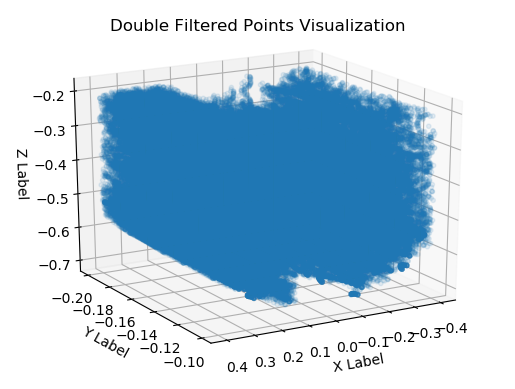

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = zip(*data)

ax.scatter(x, y, z, alpha=0.1, s=10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Double Filtered Points Visualization')
ax.view_init(elev=20, azim=60)

plt.show()


In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

filtered_data = []
with open('double_filtered_clustered_data.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header
    filtered_data = [row for row in reader]

random_selected_data = random.choices(filtered_data, k=10000)

random_csv_path = 'double_random_selected_data.csv'
with open(random_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["x", "y", "z"])  
    writer.writerows(random_selected_data)

random_csv_path


'double_random_selected_data.csv'

/home/robros/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


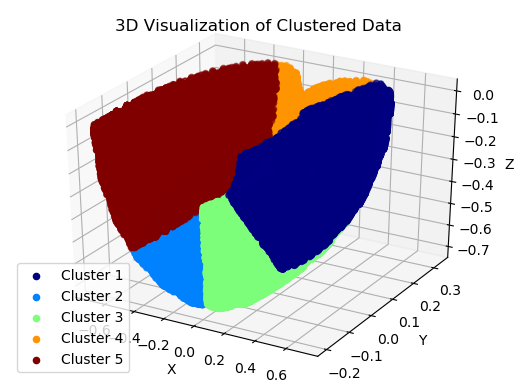

In [24]:
import csv
import numpy as np
from sklearn.cluster import KMeans

data = []
with open('filtered_clustered_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader) 
    for row in csv_reader:
        data.append([float(row[0]), float(row[1]), float(row[2])])

data = np.array(data)

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)
labels = kmeans.labels_

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.jet(np.linspace(0, 1, n_clusters))

for i in range(n_clusters):
    cluster_data = data[labels == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], s=20, color=colors[i], label=f'Cluster {i+1}')

ax.set_title('3D Visualization of Clustered Data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


In [18]:
def select_random_point_from_clustered_data(csv_clustered_path):
    """클러스터링 결과가 저장된 CSV에서 비율에 따라 랜덤 포인트 선택"""
    clustered_data = []
    labels = []
    with open(csv_clustered_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader, None)  
        for row in reader:
            clustered_data.append([float(row[i]) for i in range(3)])  
            labels.append(int(row[3])) 
            
    labels = np.array(labels)
    clustered_data = np.array(clustered_data)
    
    cluster_counts = np.bincount(labels)
    cluster_ratios = cluster_counts / len(labels)
    
    selected_cluster = np.random.choice(np.arange(len(cluster_counts)), p=cluster_ratios)
    
    selected_points = clustered_data[labels == selected_cluster]
    random_point = selected_points[np.random.randint(len(selected_points))]
    
    return random_point

csv_clustered_path = 'clustered_data.csv'
random_point = select_random_point_from_clustered_data(csv_clustered_path)
print(f"Selected Random Point: {random_point}")


Selected Random Point: [ 0.03664691 -0.61782724 -0.29242303]


In [19]:
import numpy as np
import csv

def save_random_points(csv_clustered_path, csv_output_path, n_points=5000):
    """클러스터링 결과로부터 n_points만큼 랜덤 포인트를 선택하여 저장"""
    with open(csv_clustered_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  #
        data = [row for row in reader]

    selected_indices = np.random.choice(len(data), n_points, replace=True)
    selected_points = [data[i] for i in selected_indices]

    with open(csv_output_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x", "y", "z", "cluster_label"]) 
        writer.writerows(selected_points)

csv_clustered_path = 'clustered_data.csv'
csv_output_path = 'selected_random_points.csv'

save_random_points(csv_clustered_path, csv_output_path)


In [20]:
def read_random_point(csv_input_path):
    """저장된 랜덤 포인트 CSV 파일에서 한 줄씩 포인트를 읽어 반환"""
    with open(csv_input_path, 'r', newline='') as file:
        reader = csv.reader(file)
        next(reader)  
        for row in reader:
            yield [float(row[i]) for i in range(3)] 

random_point_generator = read_random_point('selected_random_points.csv')
for _ in range(10): 
    print(next(random_point_generator))


[0.39303246201222336, -0.2906359146972518, -0.3432393760280669]
[0.2990527379285071, -0.4545618833644247, -0.21187251237770677]
[0.6503268571558403, -0.25576893232092857, 0.12715709869733396]
[0.07213766704157201, -0.7340617051449254, 0.16213469030669483]
[0.6094128387019202, -0.12395661506544994, 0.32595481501119744]
[0.1595867048136486, -0.4260644987735733, -0.2863050241057186]
[0.08003133886700264, -0.5044868038019243, 0.23605619572487135]
[-0.391717618634016, 0.10133169055713151, -0.4712403787311213]
[0.20262456784653674, -0.36633858134242386, -0.4312172838847558]
[0.2937200768874226, -0.700174908187748, 0.044740481742716644]
